In [1]:
# pip install git+https://github.com/thinh-vu/vnstock.git@main

In [2]:
from vnstock import *

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Measuring single year's operating performance
"We continue to feel that the **ratio of operating earnings** (before securities gains or losses) to shareholders’ equity 
with all **securities valued at cost** is the most appropriate way to measure any single year’s operating performance."  

-- Berkshire Letters 1979

In [12]:
IncomeStatement = financial_flow(symbol='VCS', report_type='incomestatement', report_range='yearly')
IncomeStatement = IncomeStatement.sort_index()
IncomeStatement.tail(10)

,ticker,revenue,yearRevenueGrowth,quarterRevenueGrowth,costOfGoodSold,grossProfit,operationExpense,operationProfit,yearOperationProfitGrowth,quarterOperationProfitGrowth,...,postTaxProfit,shareHolderIncome,yearShareHolderIncomeGrowth,quarterShareHolderIncomeGrowth,investProfit,serviceProfit,otherProfit,provisionExpense,operationIncome,ebitda
index,,,,,,,,,,,,,,,,,,,,,
2013,VCS,1311,0.359,None,-915,396,-153,243,0.233,None,...,68,72,0.311,None,None,None,None,None,None,376.0
2014,VCS,2064,0.574,None,-1354,709,-156,554,1.282,None,...,212,212,1.961,None,None,None,None,None,None,666.0
2015,VCS,2616,0.268,None,-1858,759,-132,626,0.131,None,...,405,405,0.908,None,None,None,None,None,None,695.0
2016,VCS,3211,0.228,None,-2220,991,-136,855,0.366,None,...,676,676,0.671,None,None,None,None,None,None,923.0
2017,VCS,4353,0.355,None,-3085,1267,-148,1119,0.309,None,...,1122,1122,0.659,None,None,None,None,None,None,1189.0
2018,VCS,4522,0.039,None,-3026,1496,-146,1350,0.206,None,...,1124,1124,0.002,None,None,None,None,None,None,1423.0
2019,VCS,5563,0.230,None,-3651,1912,-216,1696,0.256,None,...,1410,1410,0.255,None,None,None,None,None,None,1800.0
2020,VCS,5660,0.017,None,-3696,1964,-232,1732,0.021,None,...,1428,1428,0.013,None,None,None,None,None,None,1851.0
2021,VCS,7070,0.249,None,-4608,2463,-319,2143,0.237,None,...,1772,1772,0.241,None,None,None,None,None,None,2271.0


In [5]:
print(list(IncomeStatement.columns.values))

['ticker', 'revenue', 'yearRevenueGrowth', 'quarterRevenueGrowth', 'costOfGoodSold', 'grossProfit', 'operationExpense', 'operationProfit', 'yearOperationProfitGrowth', 'quarterOperationProfitGrowth', 'interestExpense', 'preTaxProfit', 'postTaxProfit', 'shareHolderIncome', 'yearShareHolderIncomeGrowth', 'quarterShareHolderIncomeGrowth', 'investProfit', 'serviceProfit', 'otherProfit', 'provisionExpense', 'operationIncome', 'ebitda']


In [6]:
x_axis = IncomeStatement.index.sort_values()
x_axis

Index(['2005', '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013',
       '2014', '2015', '2016', '2017', '2018', '2019', '2020', '2021', '2022'],
      dtype='object', name='index')

<AxesSubplot:xlabel='index', ylabel='yearOperationProfitGrowth'>

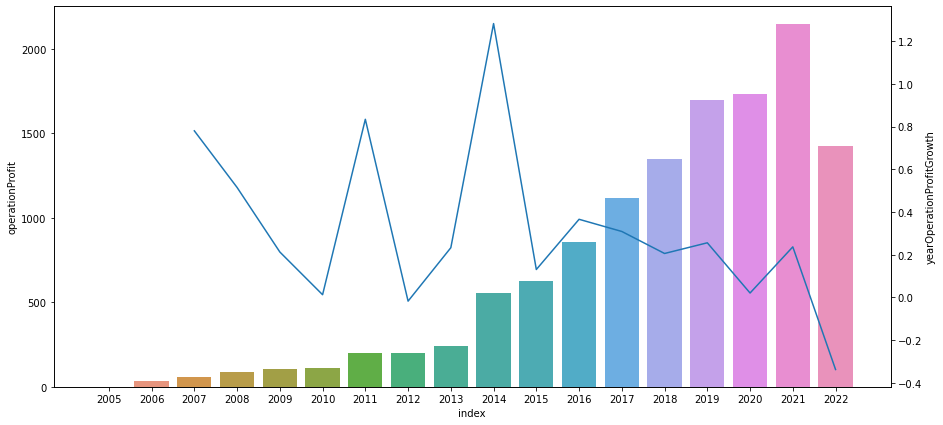

In [7]:
fig, ax1 = plt.subplots(figsize=(15,7))
ax2 = ax1.twinx() # Secondary y-axis

sns.barplot(x=x_axis, y='operationProfit', data=IncomeStatement, ax=ax1) # On primary ax1
sns.lineplot(x=x_axis, y='yearOperationProfitGrowth', data=IncomeStatement, ax=ax2) # On primary ax2

# plt.figure(figsize=(35,15))
# plt.show()


### The Big 4 Numbers that you'd like to see grow each year at least 10%
<ul>
    <li>Net Income</li>
    <li>Equity & Dividends</li>
    <li>Sales</li>
    <li>Operating Cash</li>
</ul>


In [8]:
BalanceSheet = financial_flow(symbol='VCS', report_type='balancesheet', report_range='yearly')
BalanceSheet = BalanceSheet.sort_index()
BalanceSheet.head(5)

,ticker,shortAsset,cash,shortInvest,shortReceivable,inventory,longAsset,fixedAsset,asset,debt,...,oweCentralBank,valuablePaper,payableInterest,receivableInterest,deposit,otherDebt,fund,unDistributedIncome,minorShareHolderProfit,payable
index,,,,,,,,,,,,,,,,,,,,,
2006,VCS,155,2,0,49,94,229,227,384,348,...,None,None,None,None,None,0,None,NaN,0,348
2007,VCS,237,17,10,50,145,235,198,472,289,...,None,None,None,None,None,0,None,NaN,0,289
2008,VCS,339,81,1,71,183,255,192,594,277,...,None,None,None,None,None,0,None,NaN,0,277
2009,VCS,697,267,129,96,193,285,237,982,566,...,None,None,None,None,None,0,None,NaN,0,566
2010,VCS,1010,36,47,456,374,467,287,1476,735,...,None,None,None,None,None,0,None,NaN,0,735


In [9]:
IncomeStatement.head(5)

,ticker,revenue,yearRevenueGrowth,quarterRevenueGrowth,costOfGoodSold,grossProfit,operationExpense,operationProfit,yearOperationProfitGrowth,quarterOperationProfitGrowth,...,postTaxProfit,shareHolderIncome,yearShareHolderIncomeGrowth,quarterShareHolderIncomeGrowth,investProfit,serviceProfit,otherProfit,provisionExpense,operationIncome,ebitda
index,,,,,,,,,,,,,,,,,,,,,
2005,VCS,0,NaN,None,0,0,0,0,NaN,None,...,0,0,NaN,None,None,None,None,None,None,NaN
2006,VCS,200,NaN,None,-153,47,-14,33,NaN,None,...,6,6,NaN,None,None,None,None,None,None,NaN
2007,VCS,260,0.302,None,-185,75,-17,59,0.780,None,...,41,41,6.318,None,None,None,None,None,None,NaN
2008,VCS,371,0.426,None,-256,115,-26,89,0.515,None,...,75,75,0.818,None,None,None,None,None,None,132.0
2009,VCS,521,0.405,None,-375,146,-39,108,0.213,None,...,94,94,0.252,None,None,None,None,None,None,157.0


In [10]:
print(list(BalanceSheet.columns.values))

['ticker', 'shortAsset', 'cash', 'shortInvest', 'shortReceivable', 'inventory', 'longAsset', 'fixedAsset', 'asset', 'debt', 'shortDebt', 'longDebt', 'equity', 'capital', 'centralBankDeposit', 'otherBankDeposit', 'otherBankLoan', 'stockInvest', 'customerLoan', 'badLoan', 'provision', 'netCustomerLoan', 'otherAsset', 'otherBankCredit', 'oweOtherBank', 'oweCentralBank', 'valuablePaper', 'payableInterest', 'receivableInterest', 'deposit', 'otherDebt', 'fund', 'unDistributedIncome', 'minorShareHolderProfit', 'payable']


# Long Term Results
"In measuring **long term** economic performance - in contrast to yearly performance - we believe it is appropriate to **recognize** fully any realized capital gains or losses as well as extraordinary items, and also to utilize financial statements presenting equity securities **at market value**.  Such capital gains or losses, either realized or unrealized, are fully as important to shareholders over a period of years as earnings realized in a more routine manner through operations; it is just that their impact is often extremely capricious in the short run, a characteristic that makes them inappropriate as an indicator of single year managerial performance."  (BVPS)

-- Berkshire Letters 1979